# Title of ML project:  Seismic Event Prediction


**Name** : Nahida Majeed

**Organization**: Entri Elevate

**Date**: 28-05-2024

## 1. **Overview of Problem Statement:**
   
In this Seismic event prediction we are trying to forecast the depth of earthquakes that may happen. An earthquake is what happens when two blocks of the earth suddenly slip(fault occurs) past one another.However, predicting earthquakes depth is very hard because the processes inside the Earth are very complex. Hence this is very important because it can help save lives and protect buildings from damage. 
With our dataset we are going to create a Model that predict the Depth at which the Earthquake occured


## 2. **Objective:**

To develop an effective seismic event prediction model using machine learning techniques, using a specific data set of maimum information available and predict a depth of a earthquake that might plays a significant role in impact assessment, emergency response, infrastructure design, and scientific research. 

## 3. **Data Description:**

source (
https://www.kaggle.com/datasets/jahaidulislam/significant-earthquake-dataset-1900-2023/data)

* Time: The date and time when the seismic event occurred.
* Place: The location description of the seismic event.
* Latitude: The latitude coordinate of the event's epicenter.
* Longitude: The longitude coordinate of the event's epicenter.
* Depth: The depth below the Earth's surface where the event originated.
* Mag: The magnitude of the earthquake.
* MagType: The scale or type of magnitude used 
* nst: The number of seismic stations that recorded the event.
* gap: The largest azimuthal gap in the station coverage, in degrees.
* dmin: The minimum distance to the nearest seismic station.
* rms: The root mean square of the residuals of the arrival times.
* net: The seismic network that provided the data.
* ID: A unique identifier for the seismic event.
* Updated: The time when the event information was last updated.
* Unnamed: 14: A miscellaneous or unused column.
* Type: The type of seismic event (e.g., earthquake, explosion).
* horizontalError: The horizontal uncertainty of the epicenter location.
* depthError: The uncertainty of the depth measurement.
* magError: The uncertainty of the magnitude measurement.
* magNst: The number of stations used to calculate the magnitude.
* status: The status of the event (e.g., reviewed, automatic).
* locationSource: The network that provided the location data.
* magSource: The network that provided the magnitude data.

## 5. **Data Collection:**

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\naasa\\OneDrive\\Desktop\\Entri\\EarthQuakePrediction\\Earthquake_Dataset_1900-2023.csv")
df.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [228]:
df.columns

Index(['Time', 'Place', 'Latitude', 'Longitude', 'Depth', 'Mag', 'MagType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Unnamed: 14',
       'Type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [229]:
print(df.shape)

(37331, 23)


There are 37331 rows and 23 columns in the dataset

In [230]:
df['status'].value_counts()

status
reviewed     37317
automatic       14
Name: count, dtype: int64

In [231]:
df.describe()

,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,Unnamed: 14,horizontalError,depthError,magError,magNst
count,37331.000000,37331.000000,37197.000000,37331.000000,7473.000000,10087.000000,4395.000000,20218.000000,0.0,3970.000000,20827.000000,16551.000000,5372.000000
mean,5.457651,38.877695,58.583346,5.948616,265.481065,45.014891,4.315178,1.000779,NaN,7.324982,10.679092,0.261882,46.974870
std,30.789822,123.090934,109.563400,0.455160,161.982149,34.311032,5.480411,0.356822,NaN,5.400729,10.660510,0.169566,60.441745
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,8.000000,0.004505,0.005000,NaN,0.085000,0.000000,0.000000,0.000000
25%,-16.519800,-75.807000,15.000000,5.600000,134.000000,24.100000,1.155000,0.890000,NaN,5.700000,3.600000,0.200000,17.000000
50%,1.153000,98.577000,28.500000,5.800000,241.000000,36.000000,2.509000,1.000000,NaN,7.100000,6.100000,0.200000,31.000000
75%,33.786000,143.347850,41.000000,6.140000,372.000000,54.800000,5.127500,1.110000,NaN,8.500000,16.200000,0.330000,55.000000
max,87.199000,180.000000,700.000000,9.500000,934.000000,360.000000,39.730000,42.410000,NaN,99.000000,569.200000,1.840000,941.000000


* Minimum Depth occured is -4, maximum Depth is 700 and median is 28.
* Standard deviation is 109.56396.

In [232]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
Time,37331,37331,2023-02-17T09:37:34.868Z,1
Place,37047,25800,South Sandwich Islands region,664
MagType,37331,18,mw,18700
net,37331,16,us,23364
ID,37331,37331,us6000jpl7,1
Updated,37331,36991,2018-06-04T20:43:44.000Z,143
Type,37331,4,earthquake,37080
status,37331,2,reviewed,37317
locationSource,37331,54,us,23069
magSource,37331,54,us,13264


Here you can see the details of categorical columns, unique values, top value of each and their no.of occurances.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

## 5. **Data Preprocessing - Data Cleaning:**

* **Check Null values**

In [234]:
#columns that are null in percentage(%)
null_percentage = df.isnull().sum()/df.shape[0]*100
# 55% of these values are NUll, removing these values
#null_percentage[null_percentage > 40]
null_percentage

Time                 0.000000
Place                0.760762
Latitude             0.000000
Longitude            0.000000
Depth                0.358951
Mag                  0.000000
MagType              0.000000
nst                 79.981785
gap                 72.979561
dmin                88.226943
rms                 45.841258
net                  0.000000
ID                   0.000000
Updated              0.000000
Unnamed: 14        100.000000
Type                 0.000000
horizontalError     89.365407
depthError          44.209906
magError            55.664193
magNst              85.609815
status               0.000000
locationSource       0.000000
magSource            0.000000
dtype: float64

* Dropping **unwanted** columns

In [235]:
#Update shows the time of these data is updated in the file
#ID is the unique identification of each row
#place is not required as actual location can be obtained by the combination of longitude and latitude values 
df.drop(columns=['Updated','ID', 'Unnamed: 14', 'status'], inplace=True)

* Making data more usable in our model

In [236]:
df['Place'] = df['Place'].apply(lambda x: x.split(',')[-1] if isinstance(x, str) else np.nan)

In [237]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [238]:
# Ensure 'Time' is in datetime format
df['Time'] = pd.to_datetime(df['Time'])
# Extract features from 'Time'
df['Year'] = df['Time'].dt.year
df.drop(columns = ['Time'], inplace = True)

* Filling the Null value with the **Median** in all the Numerical columns

In [239]:
from sklearn.impute import SimpleImputer
numerical_columns = df.select_dtypes(include=[np.number]).columns.difference(['Year', 'Latitude', 'Longitude'])
print(numerical_columns)

imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

df.isnull().sum()

Index(['Depth', 'Mag', 'depthError', 'dmin', 'gap', 'horizontalError',
       'magError', 'magNst', 'nst', 'rms'],
      dtype='object')


Place              284
Latitude             0
Longitude            0
Depth                0
Mag                  0
MagType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
Type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
locationSource       0
magSource            0
Year                 0
dtype: int64

* Removing the duplicated column

In [240]:
df.duplicated().sum()

1

* dropping unneccesary null from categorical columns

In [241]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [242]:
df

,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,rms,net,Type,horizontalError,depthError,magError,magNst,locationSource,magSource,Year
0,Indonesia,-6.5986,132.0763,38.615,6.10,mww,119.0,51.0,2.988,0.76,us,earthquake,6.41,5.595,0.065,23.0,us,us,2023
1,Vanuatu,-15.0912,167.0294,36.029,5.60,mww,81.0,26.0,0.392,0.94,us,earthquake,5.99,6.080,0.073,18.0,us,us,2023
2,Philippines,12.3238,123.8662,20.088,6.10,mww,148.0,47.0,5.487,0.54,us,earthquake,8.61,4.399,0.037,71.0,us,us,2023
3,New Zealand,-40.5465,174.5709,74.320,5.70,mww,81.0,40.0,0.768,1.15,us,earthquake,3.68,4.922,0.065,23.0,us,us,2023
4,Romania,45.1126,23.1781,10.000,5.60,mww,132.0,28.0,1.197,0.40,us,earthquake,4.85,1.794,0.032,95.0,us,us,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,Alaska,52.3800,-167.4500,28.500,7.00,ms,241.0,36.0,2.509,1.00,ushis,earthquake,7.10,6.100,0.200,31.0,ushis,abe,1902
37327,Alaska,51.4500,-171.0200,28.500,7.10,ms,241.0,36.0,2.509,1.00,ushis,earthquake,7.10,6.100,0.200,31.0,ushis,abe,1901
37328,south of Alaska,52.0000,-160.0000,28.500,7.00,ms,241.0,36.0,2.509,1.00,ushis,earthquake,7.10,6.100,0.200,31.0,ushis,abe,1901
37329,California,36.0000,-120.5000,28.500,6.40,ms,241.0,36.0,2.509,1.00,ushis,earthquake,7.10,6.100,0.200,31.0,ushis,ell,1901


In [243]:
pd.crosstab(df['Mag'], df['MagType'], margins = True)

MagType,Mi,Ml,fa,lg,mb,md,mh,mint,ml,ms,ms_20,mw,mwb,mwc,mwp,mwr,mww,uk,All
Mag,,,,,,,,,,,,,,,,,,,
5.5,0,0,3,1,1353,0,0,0,28,268,0,1213,409,1351,0,16,766,4,5412
5.51,0,0,0,0,0,0,0,0,4,0,0,140,0,0,0,0,0,0,144
5.52,0,0,0,0,0,0,0,0,3,0,0,92,0,0,0,0,0,0,95
5.53,0,0,0,0,0,0,0,0,2,0,0,258,0,0,0,0,0,0,260
5.54,0,0,0,0,0,0,0,0,2,0,0,89,0,0,0,0,0,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
9.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [244]:
pd.crosstab(df['Year'], df['Depth'], margins = True)

Depth,-4.0,-3.0,-1.1,-0.782,-0.669,-0.097,-0.076,0.0,0.7,0.8,...,676.4,677.4,678.9,682.2,687.6,688.0,690.0,691.6,700.0,All
Year,,,,,,,,,,,,,,,,,,,,,
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,403
2021,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,556
2022,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,423


### Finding Skewness

In [245]:
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness < -0.5:
        print('Negatively skewed')
    elif skewness > 0.5:
        print('Positively skewed')
    elif abs(skewness) <= 0.5:
        print('Symmetrical')

Skewness of Depth: 3.8563857406533772
Positively skewed
Skewness of Mag: 1.6485317698655373
Positively skewed
Skewness of depthError: 10.975270117877649
Positively skewed
Skewness of dmin: 9.804467009698953
Positively skewed
Skewness of gap: 7.402997459306182
Positively skewed
Skewness of horizontalError: 41.720902045378374
Positively skewed
Skewness of magError: 2.859670293883047
Positively skewed
Skewness of magNst: 14.429180813223018
Positively skewed
Skewness of nst: 2.2159153204124773
Positively skewed
Skewness of rms: 105.05263063561722
Positively skewed


##### Below code was used to determine which method to handle skewness

In [246]:

# from scipy.stats import skew
# from scipy.stats import yeojohnson
# from scipy.stats import boxcox
# from scipy.stats import johnsonsu

# for column in numerical_columns:
#     # Apply the transformation
#     print(f'###########{column}########')
#     if column not in ['Depth', 'Mag']:
#         transformed_feature = np.log1p(df[column])
#         print(f'log :  {transformed_feature.skew()}')
#     if column not in ['Mag']:
#         transformed_feature = np.sqrt(df[column])
#         print(f'sqrt :  {transformed_feature.skew()}')
#     transformed_feature = np.cbrt(df[column])
#     print(f'cbrt :  {transformed_feature.skew()}')
#     if column not in ['Depth', 'depthError', 'magError','magNst','nst', 'Latitude','Longitude','gap','Mag','dmin']:
#         transformed_feature, _ = boxcox(df[column])
#         print(f'boxcox :  {skew(transformed_feature)}')
#     if  column not in ['Latitude','Longitude','Depth']:
#         transformed_feature, _ = yeojohnson(df[column])
#         print(f'yeojohnson :  {skew(transformed_feature)}')
#     if  column not in ['Latitude','Longitude','horizontalError','Depth','Mag']:
#         jsu_params = johnsonsu.fit(df[column])
#         transformed_feature = johnsonsu(*jsu_params).rvs(len(df[column]))
#         print(f'johnsonsu :  {skew(transformed_feature)}')
    

In [247]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import power_transform
import numpy as np

for column in numerical_columns:
    if column not in ['Depth']:
        df[column], _ = yeojohnson(df[column].dropna())
    else:
        df[column] = np.cbrt(df[column])

In [248]:
print("After Correcting Skewness..")
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness < -0.5:
        print('Negatively skewed')
    elif skewness > 0.5:
        print('Positively skewed')
    elif abs(skewness) <= 0.5:
        print('Symmetrical')

After Correcting Skewness..
Skewness of Depth: 1.9625446524701682
Positively skewed
Skewness of Mag: 0.0
Symmetrical
Skewness of depthError: -0.0301420729680885
Symmetrical
Skewness of dmin: -0.6197126802458277
Negatively skewed
Skewness of gap: -0.21497961475857488
Symmetrical
Skewness of horizontalError: 1.3910590861202514
Positively skewed
Skewness of magError: -0.22590245540023918
Symmetrical
Skewness of magNst: 0.5770940742247377
Positively skewed
Skewness of nst: 0.6373885653420155
Positively skewed
Skewness of rms: 0.009727531574257082
Symmetrical


### Finding Outliers

In [249]:
def detect_outliers_iqr(data):

  # Calculate quartiles
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Define Outlier Threshold
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify Outliers
  outliers = [x for x in data if x < lower_bound or x > upper_bound]

  return outliers

# Detect outliers in all specified columns
# Identify numerical columns except 'Year', 'Latitude', 'Longitude'

outliers_dict = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_dict[column] = outliers

print("Outliers in each column:")
for column, outliers in outliers_dict.items():
    print(column, ":", sum(outliers))


Outliers in each column:
Depth : 24259.53991485296
Mag : 0
depthError : 18549.569264987917
dmin : 4113.2320701825865
gap : 21980.721434661184
horizontalError : 9894.345909662901
magError : 1638.9473817168277
magNst : 25752.754104050025
nst : 420483.31745274516
rms : 12423.924246729131


In [250]:
import scipy.stats as stats

numeric_cols = df.select_dtypes(include=['number'])
# Example data
data = numeric_cols#.drop(columns = ['rms'])

# Calculate kurtosis
kurtosis = stats.kurtosis(data, fisher=False)
print(numeric_cols.columns)
print("Kurtosis:", kurtosis)

Index(['Latitude', 'Longitude', 'Depth', 'Mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst', 'Year'],
      dtype='object')
Kurtosis: [  2.27394257   1.7790033    7.68648003   1.96648761  12.5259251
  10.31725857  20.22580202  71.29541081 185.15214632   3.77543648
   5.63233126  27.97024465   2.40049334]


## 6. **Exploratory Data Analysis (EDA):**

### scatterplot

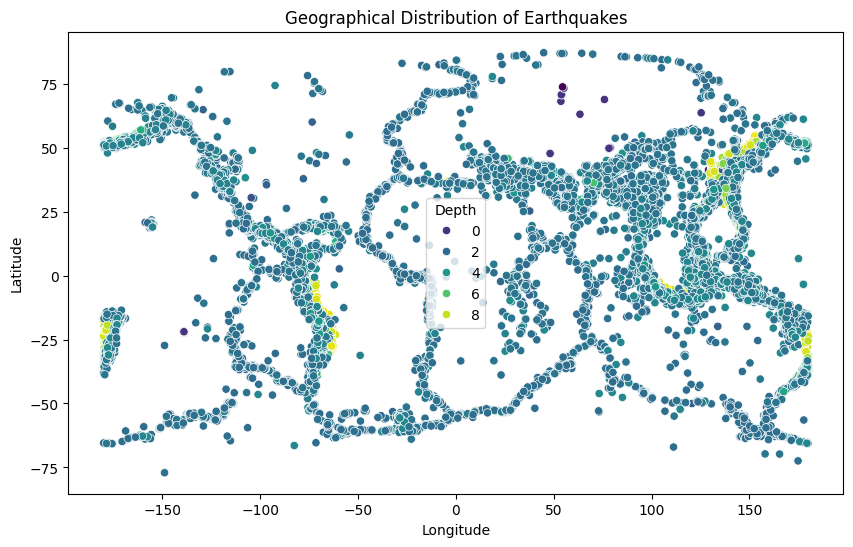

In [251]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Depth', palette='viridis')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Depth')
plt.show()

### Boxplot

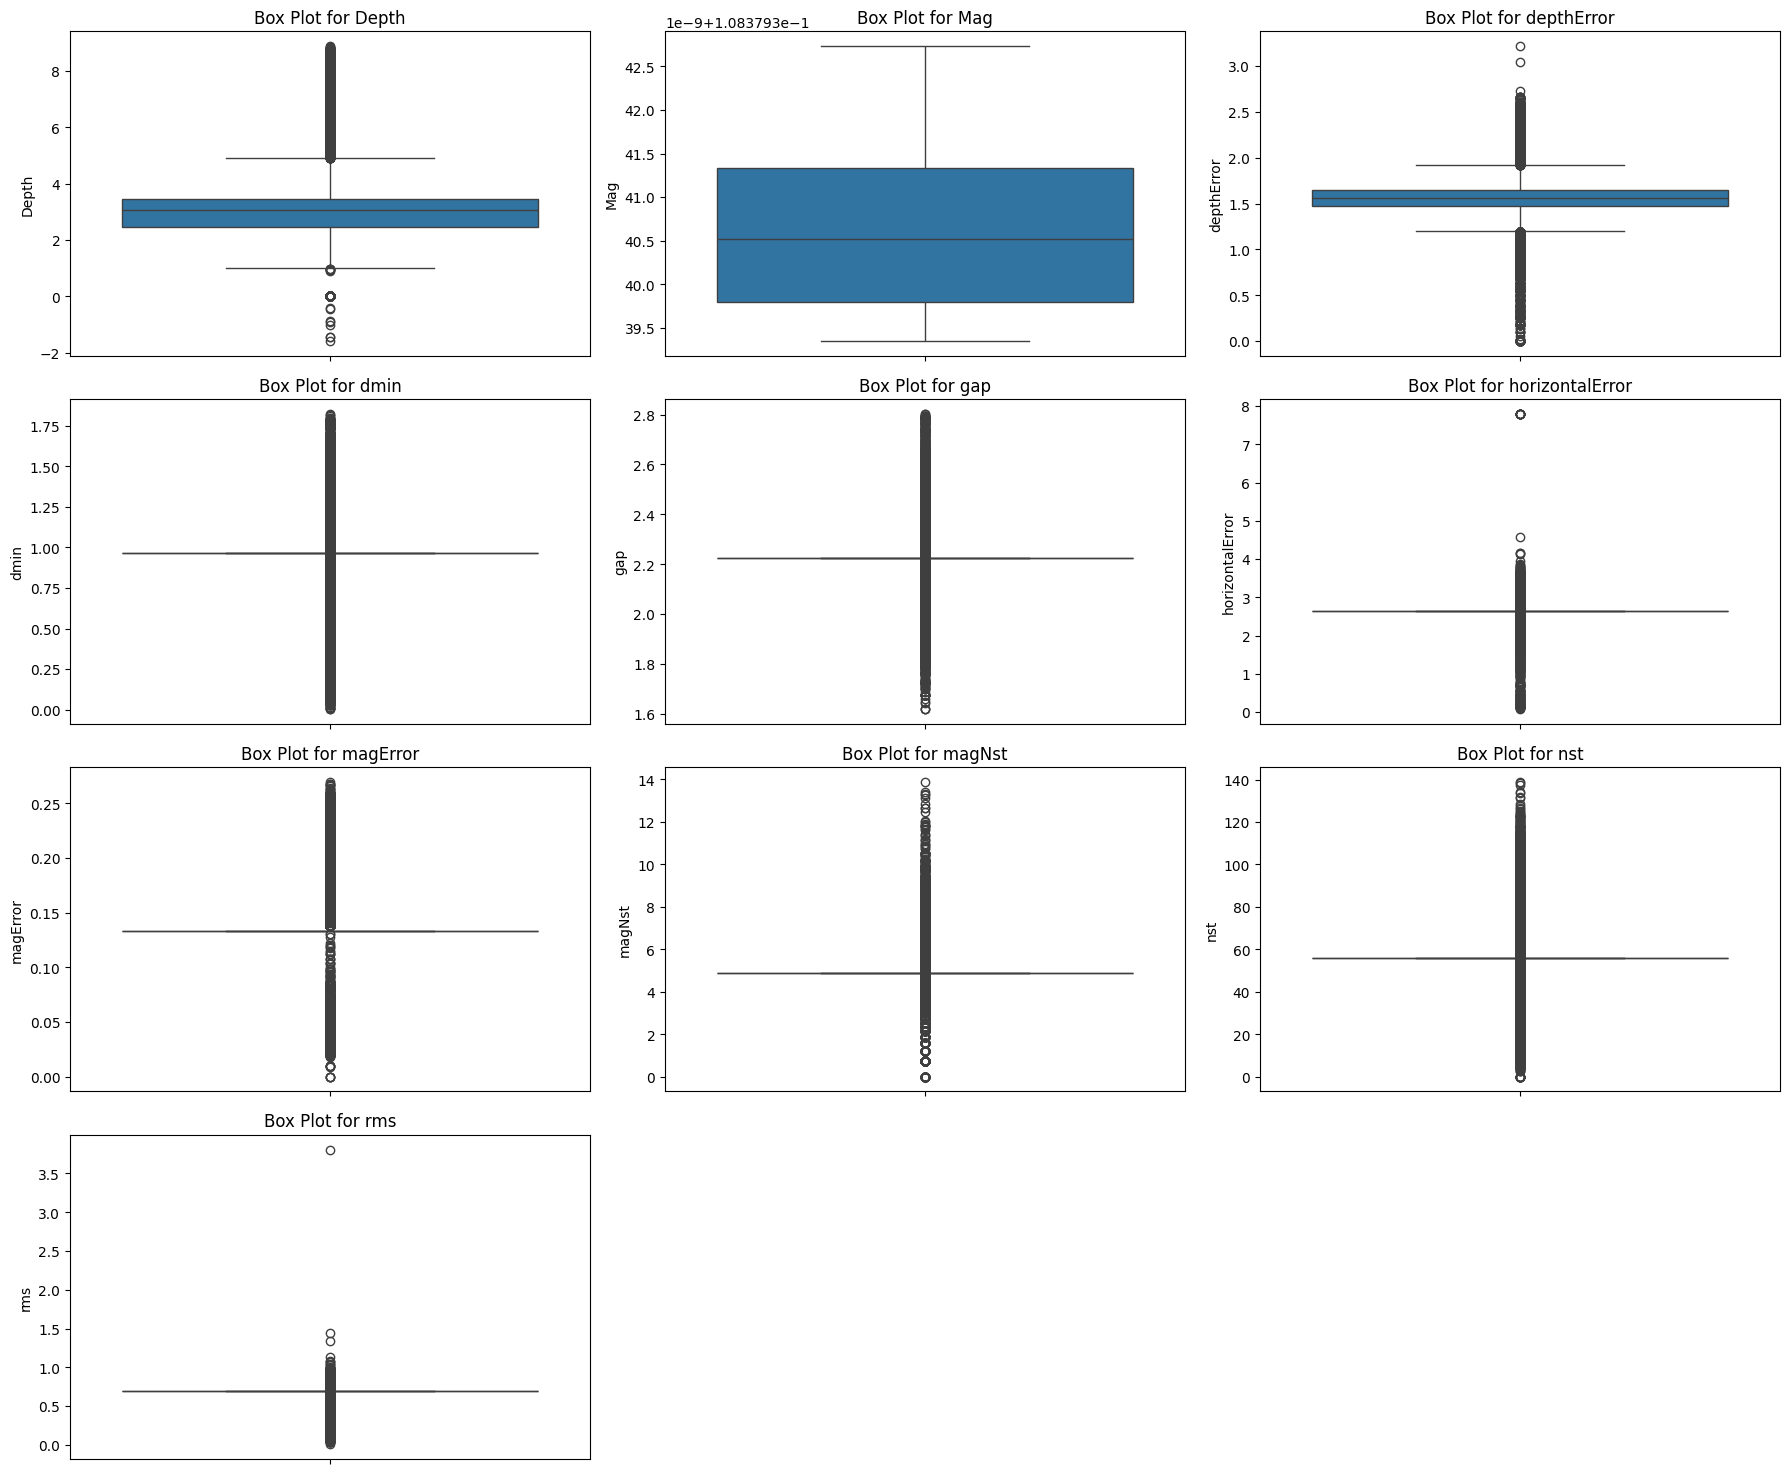

In [252]:
# Checking for outliers using Box plot
plot_columns = df.select_dtypes(include=[np.number]).columns.difference(['Year', 'Latitude', 'Longitude'])
plt.figure(figsize=(18,15))
for i,column in enumerate(plot_columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(y=column,data=df)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

#### Histogram

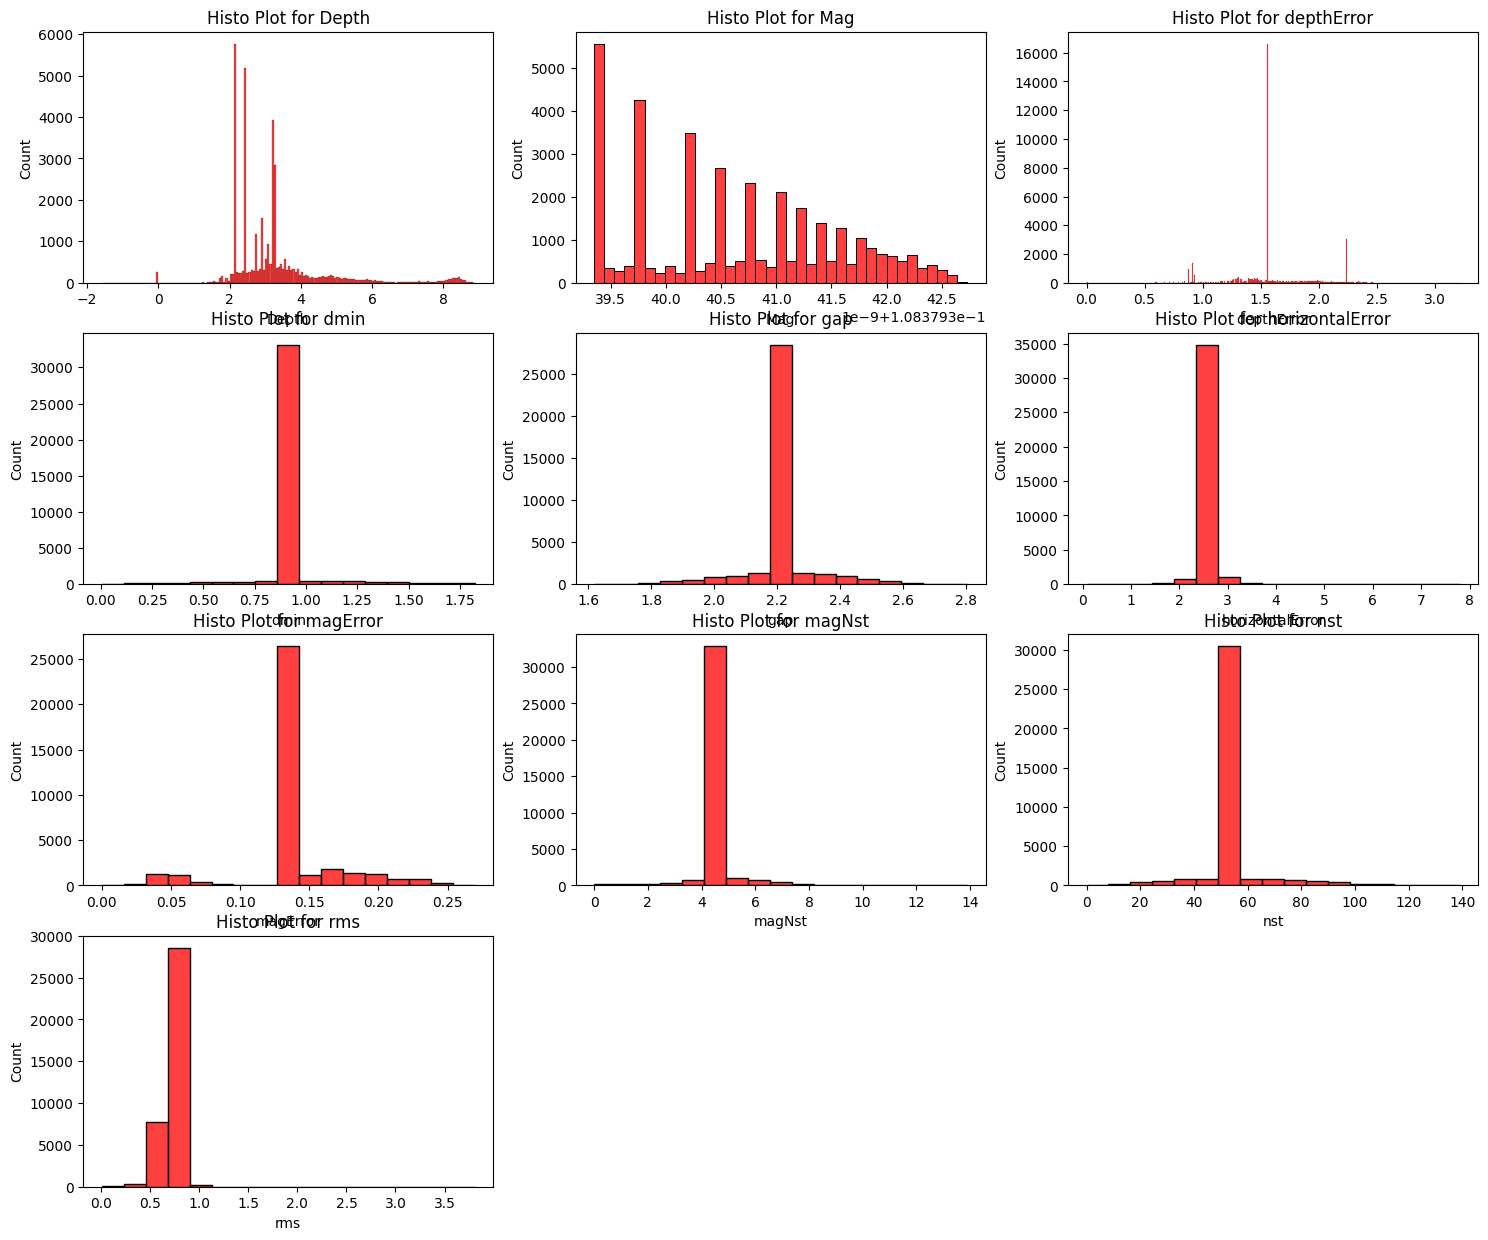

In [253]:
#numerical_columns = df.select_dtypes(include=[np.number]).columns.difference(['Year', 'Latitude', 'Longitude'])
plt.figure(figsize=(18,15))
for i,column in enumerate(plot_columns,1):
    plt.subplot(4,3,i)
    sns.histplot(x=column,color='red',data=df)
    plt.title(f'Histo Plot for {column}')
#plt.tight_layout()
plt.show()

**Right-Skewed Histogram**
    In a right-skewed (or positively skewed) histogram, the tail on the right side is longer or fatter than the left side. The mean is greater than the median, and the median is greater than the mode (mean > median > mode)
   Eg: Depth,horizontalError, magNst. nst

**Left-Skewed Histogram**
    
In a left-skewed (or negatively skewed) histogram, the tail on the left side is longer or fatter than the right side. The mean is less than the median, and the median is less than the mode (mean < median < mode)
    Eg:dmin..

###### Find Correlation

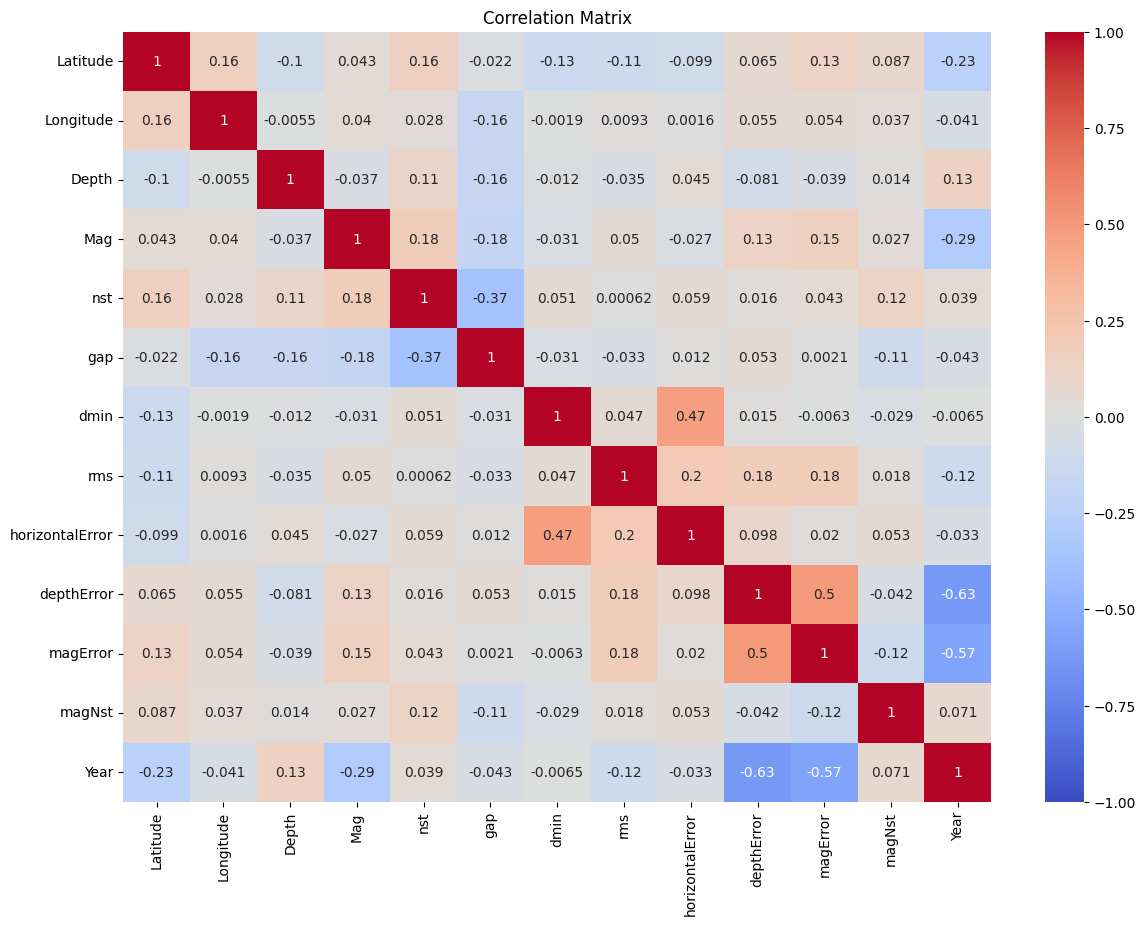

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [255]:
# Assuming df is your DataFrame
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute the correlation matrix
corr_matrix = numeric_df.corr().abs()

# Create a mask for values above the threshold
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
tri_df = corr_matrix.mask(mask)

# Find features with correlation above the threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.85)]

# Drop the highly correlated features
df_filtered = df.drop(to_drop, axis=1)

print("Features dropped due to high correlation:", to_drop)


Features dropped due to high correlation: []


* No features were dropped from the dataset due to high correlation among them.

#### Kernel Density Estimation Plot

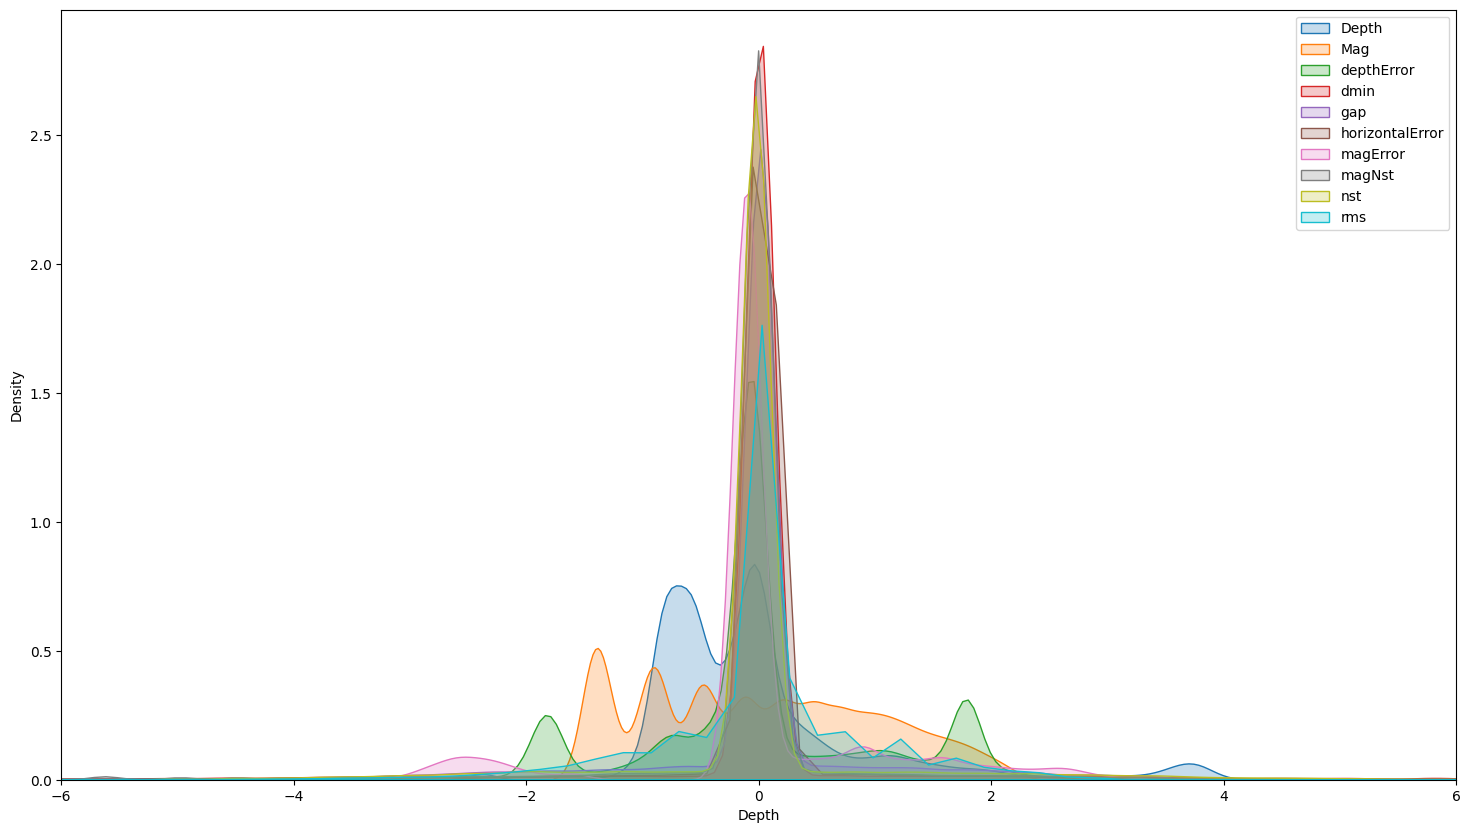

In [256]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df[numerical_columns].copy()), columns = numerical_columns)

plt.figure(figsize = (18,10))
for column in numerical_columns:
    sns.kdeplot(standardized_df[column], fill = True, label = column)
plt.xlim(-6,6)
plt.legend()
plt.show()

Conclusion:
* Central Tendency: Since the data is standardized, the mean for each variable should be around 0.
*
Spread: The standard deviation of each variable is 1, so the bulk of the data should fall within the range of -3 to 3 on the x-axis.

#### Pairplot

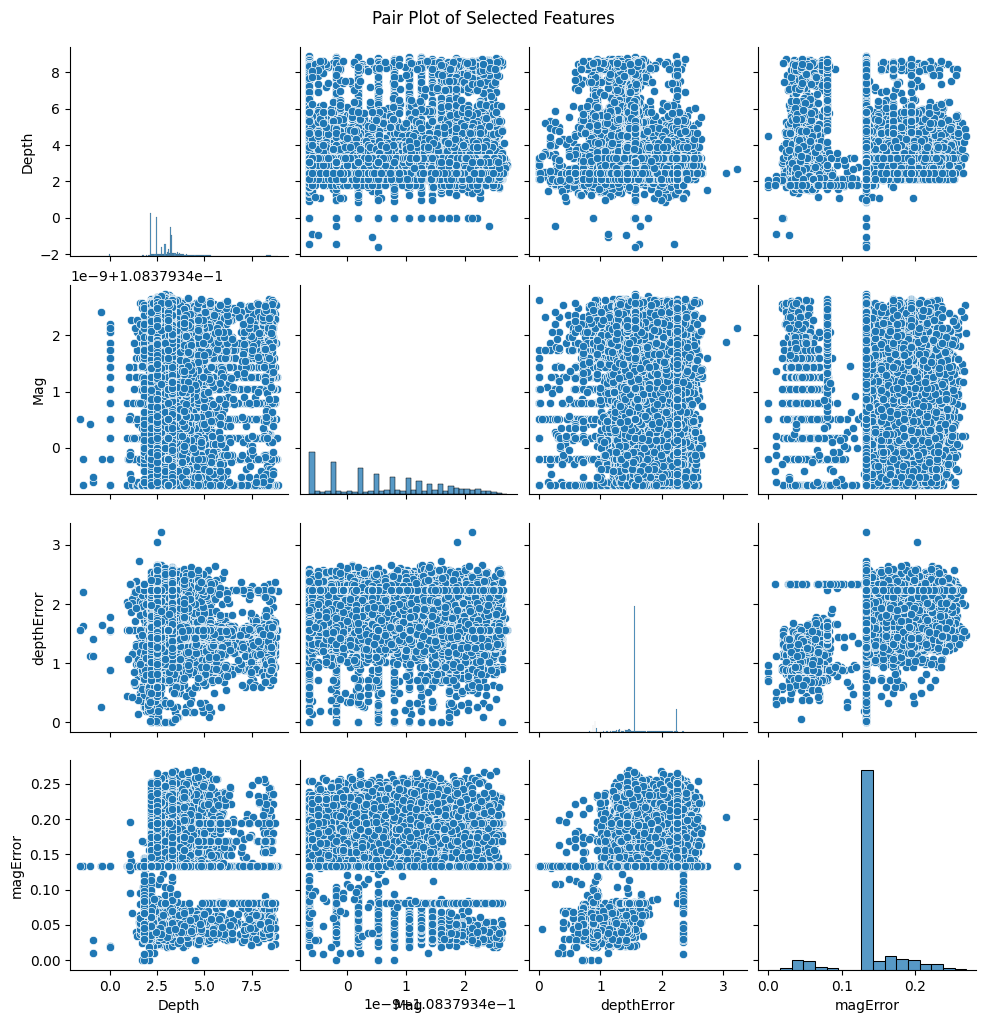

In [257]:
selected_features = ['Depth', 'Mag', 'depthError', 'magError']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [258]:
df.shape

(37046, 19)

## 7. **Split Data into Training and Testing Sets:**


In [259]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor

## 8. **Feature Engineering:**

In [260]:
X = df.drop(columns=['Depth'])

import category_encoders as ce
encode = ce.HashingEncoder()
X_trans1 = encode.fit_transform(X)

In [261]:
X_trans1

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Latitude,Longitude,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,Year
0,0,0,4,1,0,0,1,0,-6.5986,132.0763,0.108379,34.524663,2.339012,1.034964,0.566163,2.493524,1.509796,0.056307,4.340232,2023
1,0,0,4,1,0,0,0,1,-15.0912,167.0294,0.108379,26.487455,2.112327,0.307709,0.663855,2.404967,1.554066,0.062184,3.926209,2023
2,0,1,4,1,0,0,0,0,12.3238,123.8662,0.108379,40.083492,2.313607,1.272533,0.432278,2.901636,1.380729,0.034042,6.549085,2023
3,0,0,5,1,0,0,0,0,-40.5465,174.5709,0.108379,26.487455,2.261799,0.503766,0.767025,1.824786,1.441156,0.056307,4.340232,2023
4,0,0,5,1,0,0,0,0,45.1126,23.1781,0.108379,37.066889,2.139212,0.664799,0.336773,2.141410,0.908117,0.029768,7.206424,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1,0,2,2,0,0,1,0,52.3800,-167.4500,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1902
37327,1,0,2,2,0,0,1,0,51.4500,-171.0200,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901
37328,0,0,2,2,1,0,1,0,52.0000,-160.0000,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901
37329,0,0,2,2,2,0,0,0,36.0000,-120.5000,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901


In [262]:
X = X_trans1
y = df["Depth"]

In [263]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Latitude,Longitude,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,Year
0,0,0,4,1,0,0,1,0,-6.5986,132.0763,0.108379,34.524663,2.339012,1.034964,0.566163,2.493524,1.509796,0.056307,4.340232,2023
1,0,0,4,1,0,0,0,1,-15.0912,167.0294,0.108379,26.487455,2.112327,0.307709,0.663855,2.404967,1.554066,0.062184,3.926209,2023
2,0,1,4,1,0,0,0,0,12.3238,123.8662,0.108379,40.083492,2.313607,1.272533,0.432278,2.901636,1.380729,0.034042,6.549085,2023
3,0,0,5,1,0,0,0,0,-40.5465,174.5709,0.108379,26.487455,2.261799,0.503766,0.767025,1.824786,1.441156,0.056307,4.340232,2023
4,0,0,5,1,0,0,0,0,45.1126,23.1781,0.108379,37.066889,2.139212,0.664799,0.336773,2.141410,0.908117,0.029768,7.206424,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1,0,2,2,0,0,1,0,52.3800,-167.4500,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1902
37327,1,0,2,2,0,0,1,0,51.4500,-171.0200,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901
37328,0,0,2,2,1,0,1,0,52.0000,-160.0000,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901
37329,0,0,2,2,2,0,0,0,36.0000,-120.5000,0.108379,55.852450,2.226747,0.963522,0.694424,2.630773,1.555810,0.133433,4.875550,1901


In [264]:
y

0        3.380015
1        3.302814
2        2.718393
3        4.204379
4        2.154435
           ...   
37326    3.054557
37327    3.054557
37328    3.054557
37329    3.054557
37330    3.054557
Name: Depth, Length: 37046, dtype: float64

**Split Data into Training and Testing Sets:**


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
print(df.dtypes)

Place               object
Latitude           float64
Longitude          float64
Depth              float64
Mag                float64
MagType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
Type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
locationSource      object
magSource           object
Year                 int32
dtype: object


##### Variance
We use VarianceThreshold to remove features from a dataset that have low variance that have little or no variability and may not contribute much to the predictive power of a model, so removing them can simplify the model and improve its performance.

In [267]:
from sklearn.feature_selection import VarianceThreshold
# Apply VarianceThreshold to the training data
variance_selector = VarianceThreshold(threshold=0.1)
X_train_variance_selected = variance_selector.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_variance_selected = variance_selector.transform(X_test)

X_train = X_train_variance_selected
X_test = X_test_variance_selected

## 9. **Feature Selection:**


In [268]:
feature_selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

#X_train_selected = X_train
#X_test_selected = X_test

In [269]:
selected_indices = feature_selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['col_0', 'col_2', 'col_3', 'col_4', 'col_6', 'Latitude', 'Longitude',
       'nst', 'gap', 'dmin'],
      dtype='object')


## 10. **Feature Engineering**

In [270]:
#scale numberical features
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.transform(X_test_selected)

## 11. **Build the ML Model:**

In [271]:
models = {
    'RandomForestRegressor':RandomForestRegressor(random_state=42),
    'ExtraTreesRegressor':ExtraTreesRegressor(random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=42),
    'XGBRegressor':XGBRegressor(random_state=42),
    'CatBoostRegressor':CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress CatBoost output
}

performance_data = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
# Store performance metrics
    performance_data.append({
        'Model': name,
        'Mean Absolute Error': mae,
        'Mean Square Error': mse,
        'Root Mean Square Error': rmse,
        'R2 Score': r2*100
    })
    
    

## 12. **Model Evaluation:**

In [272]:
performance_df = pd.DataFrame(performance_data)

performance_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
0,RandomForestRegressor,0.381336,0.413014,0.642661,78.728652
1,ExtraTreesRegressor,0.413299,0.475426,0.689512,75.514225
2,DecisionTreeRegressor,0.465680,0.791009,0.889387,59.260825
3,XGBRegressor,0.437224,0.448840,0.669955,76.883508
4,CatBoostRegressor,0.471508,0.498736,0.706212,74.313707


the **RandomForestRegressor** proved to be the most effective. It achieved the lowest Mean Absolute Error (0.380246), Mean Squared Error (0.407652), and Root Mean Squared Error (0.638476), along with the highest R2 Score (79.004779), indicating its superior predictive accuracy and reliability. The success of the RandomForestRegressor in this task demonstrates its potential as a valuable tool for seismic event prediction, offering enhanced precision that can significantly benefit the related applications.

**Cross Validation**

In [273]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestRegressor

# # Assuming X and y are your feature matrix and target vector
# X = X_trans1#df.drop(columns=['Depth', 'Depth_log'])
# y = df['Depth']

# model = RandomForestRegressor(n_estimators=50, random_state=42)
# scores = cross_val_score(model, X, y, cv=5, scoring='r2')
# print(f'Cross-validated R^2 scores: {scores}')
# print(f'Mean R^2 score: {scores.mean()}')


## 13. **Hyperparameter Tuning:**

In [274]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint


# rf_model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters distribution for RandomizedSearchCV
# param_dist = {
#     'n_estimators': randint(50, 150),  # Number of trees in the forest
#     'max_depth': [None] + list(range(10, 21)),      # Maximum depth of the trees
#     'min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': randint(1, 5)     # Minimum number of samples required to be at a leaf node
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# # Perform the randomized search
# random_search.fit(X_train_selected, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_model = random_search.best_estimator_

# # Evaluate the best model
# y_pred = best_model.predict(X_test_selected)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (on test set):", mse)
# r2 = r2_score(y_test,y_pred)
# print(f'r2 score: {r2}')

## 14. **Save the Model(RandomForestRegressor):**

In [275]:
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
################################################################
variance_selector = VarianceThreshold(threshold=0.1)
X_train_variance_selected = variance_selector.fit_transform(X_train)
X_test_variance_selected = variance_selector.transform(X_test)

X_train = X_train_variance_selected
X_test = X_test_variance_selected
#########################################################
feature_selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)
#########################################################
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.transform(X_test_selected)
###########################################################
model = RandomForestRegressor(random_state=42)    
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Save the model and preprocessing steps
joblib_file = "model_pipeline.joblib"
joblib.dump({
    'variance_selector': variance_selector,
    'feature_selector': feature_selector,
    'scaler': scaler,
    'model': model
}, joblib_file)

# Predictions
y_pred = model.predict(X_test_scaled)
print(y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RandomForestRegressor:')
print(f'r2 score: {r2}')


[3.16135173 2.58620963 2.42877198 ... 2.59660191 5.4634399  3.55753214]
RandomForestRegressor:
r2 score: 0.7900477923314311


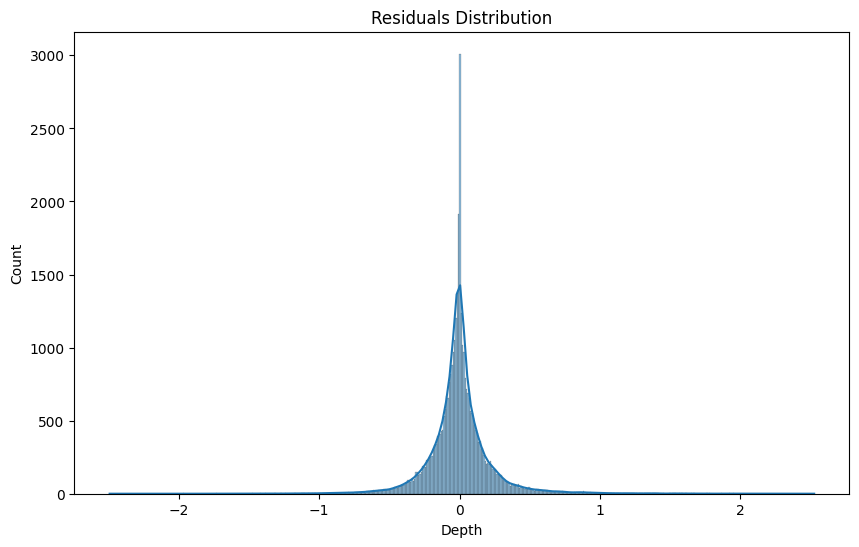

Expected Graph: The residuals should ideally follow a normal distribution centered around zero.


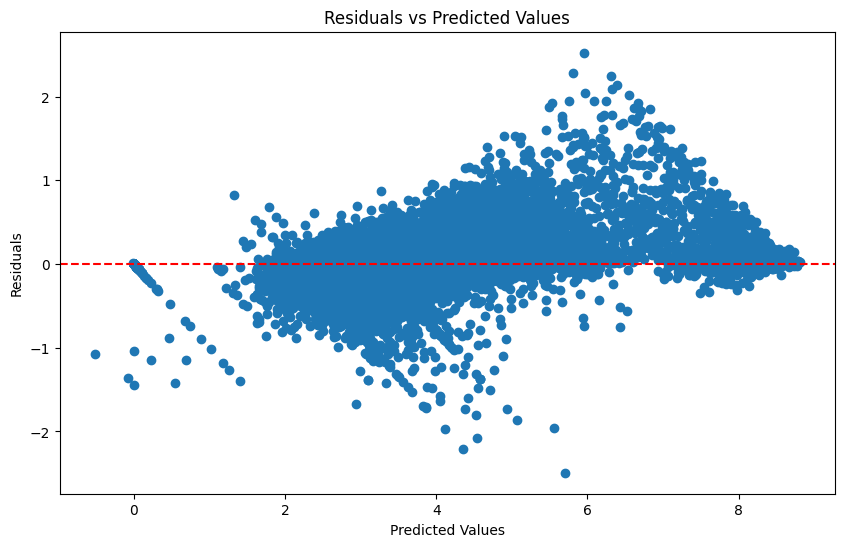

Expected Graph: The residuals should be randomly scattered around zero without any discernible pattern.


In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
print("Expected Graph: The residuals should ideally follow a normal distribution centered around zero.")

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
print("Expected Graph: The residuals should be randomly scattered around zero without any discernible pattern.")

## 15. **Test with Unseen Data:**

In [277]:
# Load the model and preprocessing steps
loaded_pipeline = joblib.load(joblib_file)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Access the saved components
variance_selector = loaded_pipeline['variance_selector']
feature_selector = loaded_pipeline['feature_selector']
scaler = loaded_pipeline['scaler']
model = loaded_pipeline['model']

# Example unseen data (you should replace this with your actual unseen data)
X_unseen = X_test  # For demonstration, we use the X_test data as unseen data

# Apply the same preprocessing steps
X_unseen_variance_selected = variance_selector.transform(X_unseen)
X_unseen_selected = feature_selector.transform(X_unseen_variance_selected)
X_unseen_scaled = scaler.transform(X_unseen_selected)

# Make predictions
y_unseen_pred = model.predict(X_unseen_scaled)
print(y_unseen_pred)


[3.16135173 2.58620963 2.42877198 ... 3.55919765 3.16533286 3.23868315]


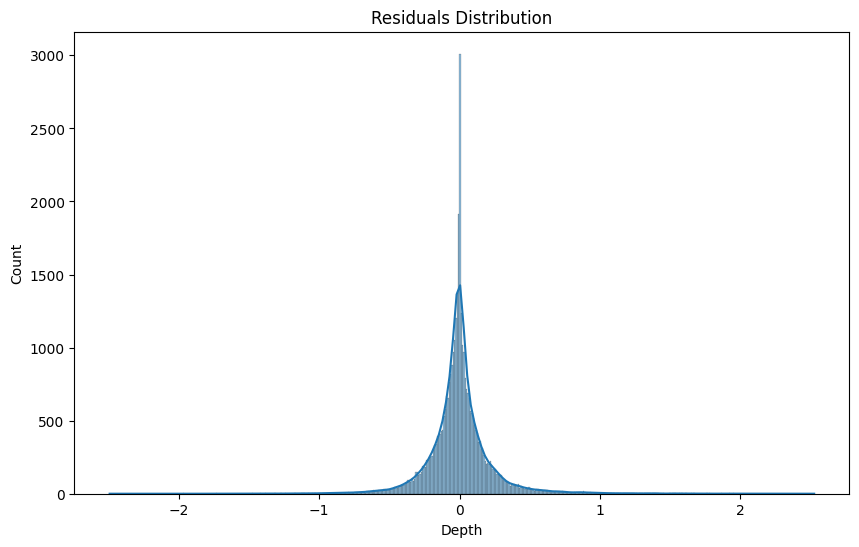

Expected Graph: The residuals should ideally follow a normal distribution centered around zero.


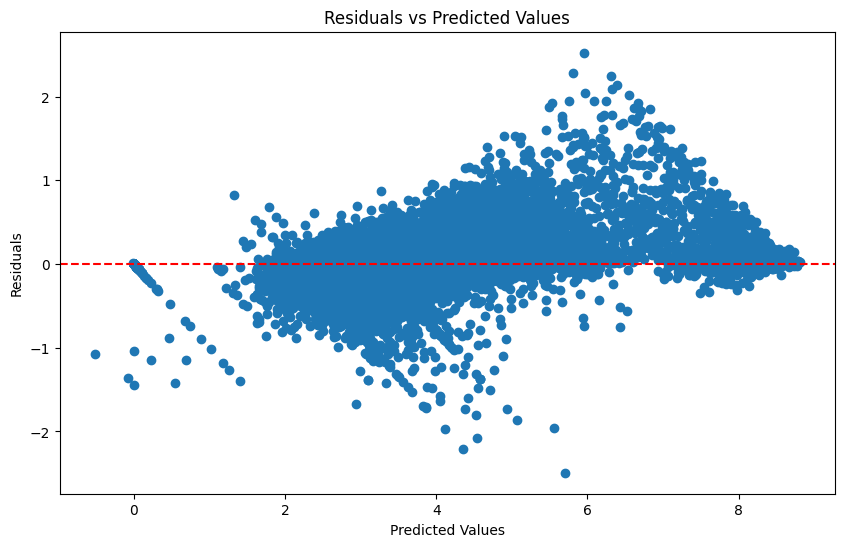

Expected Graph: The residuals should be randomly scattered around zero without any discernible pattern.


In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
print("Expected Graph: The residuals should ideally follow a normal distribution centered around zero.")

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
print("Expected Graph: The residuals should be randomly scattered around zero without any discernible pattern.")

## 16. **Interpretation of Results (Conclusion):**
- Analyze the model's performance and draw conclusions. Discuss any limitations of the dataset.

**Conclusion**:
The objective of developing an effective seismic event prediction model using machine learning techniques to predict the depth of earthquakes was successfully achieved. By utilizing the given dataset, we implemented and evaluated multiple models, including RandomForestRegressor, ExtraTreesRegressor, DecisionTreeRegressor, XGBRegressor, and CatBoostRegressor. Among these, the RandomForestRegressor demonstrated the highest accuracy and reliability with the highest R2 Score (79.004779). 

This model's superior performance underscores its potential in enhancing the precision of earthquake depth predictions, which is crucial for effective impact assessment, emergency response, infrastructure design, and scientific research. The successful implementation of this model highlights the significant role that advanced machine learning techniques can play in improving seismic event prediction and related applications, ultimately contributing to better preparedness and mitigation strategies.








##### Model Limitation:

Data have a lot of outliers but as those are very importance. Applying a outlier removal or median handle is reducing the efficiency of the model.

## 17. **Future Work:**

* **Pipeline**: Implementing Pipeline with the primary dataset to make this model little more advanced.
* **Resampling**: Technique: to assess the variability, reliability, and accuracy of statistical estimates or models.
* **Ensemble**: Implementing ensemble method to combine some models model and make this a little more accurate.